In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/admin/Desktop/data mining/project 1/homelessness_shelter_data.csv')
df.head()

,id,date,shelter_name,city,state,total_capacity,occupied_beds,available_beds,occupancy_rate,average_age,male_percentage,female_percentage,season,notes
0,1,2023-10-05,Sunrise Shelter,Dallas,TX,85,62,23,72.9,19,43,57,Spring,High demand
1,2,2023-08-01,Safe Haven,Dallas,TX,128,117,11,91.4,58,45,55,Summer,No issues reported
2,3,2025-04-27,Second Chance,San Jose,CA,190,144,46,75.8,56,52,48,Summer,Excellent condition
3,4,2024-10-05,Harbor Home,San Jose,CA,115,7,108,6.1,63,48,52,Autumn,Needs maintenance
4,5,2024-09-15,Harbor Home,San Antonio,TX,155,65,90,41.9,21,48,52,Summer,No issues reported


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   date               1000 non-null   object 
 2   shelter_name       1000 non-null   object 
 3   city               1000 non-null   object 
 4   state              1000 non-null   object 
 5   total_capacity     1000 non-null   int64  
 6   occupied_beds      1000 non-null   int64  
 7   available_beds     1000 non-null   int64  
 8   occupancy_rate     1000 non-null   float64
 9   average_age        1000 non-null   int64  
 10  male_percentage    1000 non-null   int64  
 11  female_percentage  1000 non-null   int64  
 12  season             1000 non-null   object 
 13  notes              913 non-null    object 
dtypes: float64(1), int64(7), object(6)
memory usage: 109.5+ KB


### Everything within the dataset is non-null int, float, or objects so not much preprocessing needs to be performed on this dataset.
### Additionally, State, shelter, and city names are all following the same format for entire dataset so these do not need to be altered either.

In [5]:
df.describe()

,id,total_capacity,occupied_beds,available_beds,occupancy_rate,average_age,male_percentage,female_percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,179.123000,91.874000,87.249000,51.214700,42.037000,54.634000,45.366000
std,288.819436,73.419195,67.068937,65.531224,28.880331,13.768122,8.797468,8.797468
min,1.000000,50.000000,0.000000,0.000000,0.000000,18.000000,40.000000,30.000000
25%,250.750000,115.000000,38.000000,35.000000,26.775000,30.000000,47.000000,38.000000
50%,500.500000,182.000000,76.000000,71.000000,51.850000,42.000000,55.000000,45.000000
75%,750.250000,243.000000,136.000000,128.250000,76.800000,54.000000,62.000000,53.000000
max,1000.000000,300.000000,294.000000,296.000000,100.000000,65.000000,70.000000,60.000000


## Standard Deviation Analysis

STD for total_capacity, occupied beds, available beds, and occupancy rate is high, with alot of variation within the data.

## Mean
Notably, the occupancy rate has an average of 51% possibly stating that shelters are not overcrowding overall but may have high demand in certain states, areas, or times of year

# Exploratory Data Analysis using Visualizations

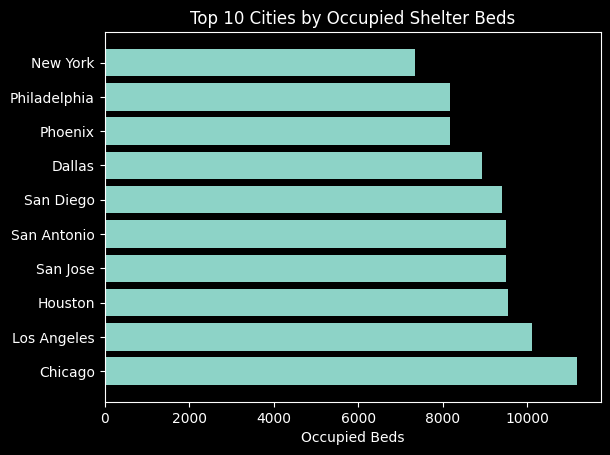

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

city_occupied = df.groupby("city")["occupied_beds"].sum().reset_index().sort_values("occupied_beds", ascending=False).head(10)

plt.barh(city_occupied["city"], city_occupied["occupied_beds"])
plt.xlabel("Occupied Beds")
plt.title("Top 10 Cities by Occupied Shelter Beds")
plt.show()


The above bar chart showcases ten major cities and their occupied shelter beds.  Interestingly, New York has a lower value of occupied beds than Chicago even though NYC has a higher population count.

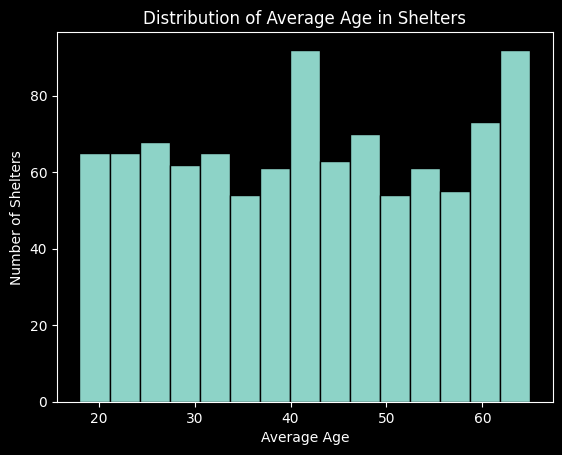

In [7]:
plt.hist(df["average_age"],bins=15, edgecolor="black")
plt.xlabel("Average Age")
plt.ylabel("Number of Shelters")
plt.title("Distribution of Average Age in Shelters")
plt.show()

The above chart showcases the average age distrubtion amongst shelters, with the two ages with highest counts range around mid 40's and 70 years of age

# Does a specific gender have higher rates of homelessness?

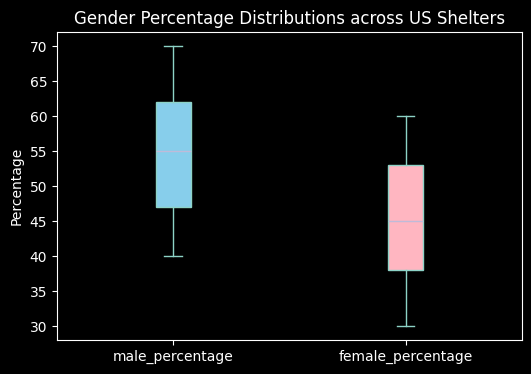

In [8]:
import matplotlib.pyplot as plt

ax = df[['male_percentage', 'female_percentage']].plot(
    kind='box',
    patch_artist=True,  
    figsize=(6,4)
)
colors = ["skyblue", "lightpink"]


for i, box in enumerate(ax.patches):  
    box.set_facecolor(colors[i % len(colors)])

plt.title('Gender Percentage Distributions across US Shelters')
plt.ylabel('Percentage')
plt.show()

Note:  AI tools were consulted in order to make box and whisker plots color-coded to represent the two different genders

# Capacity of Shelters vs Occupancy Rates

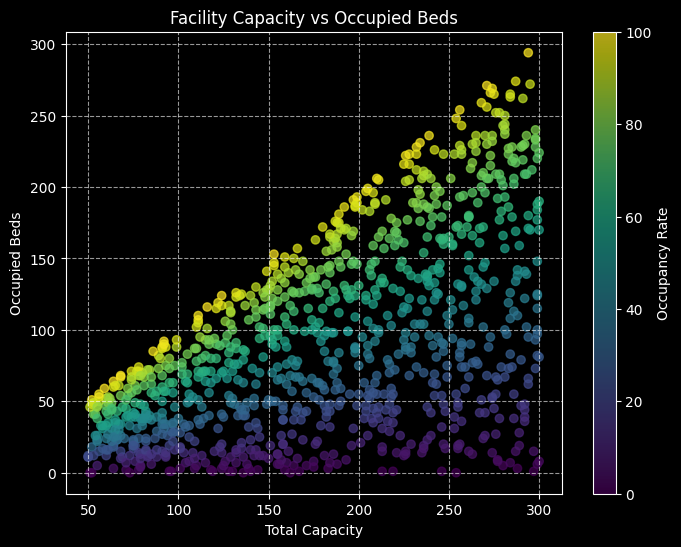

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of total capacity vs occupied beds
plt.figure(figsize=(8,6))
plt.scatter(df['total_capacity'], df['occupied_beds'], 
            c=df['occupancy_rate'], cmap='viridis', alpha=0.7)

plt.colorbar(label='Occupancy Rate')
plt.xlabel('Total Capacity')
plt.ylabel('Occupied Beds')
plt.title('Facility Capacity vs Occupied Beds')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


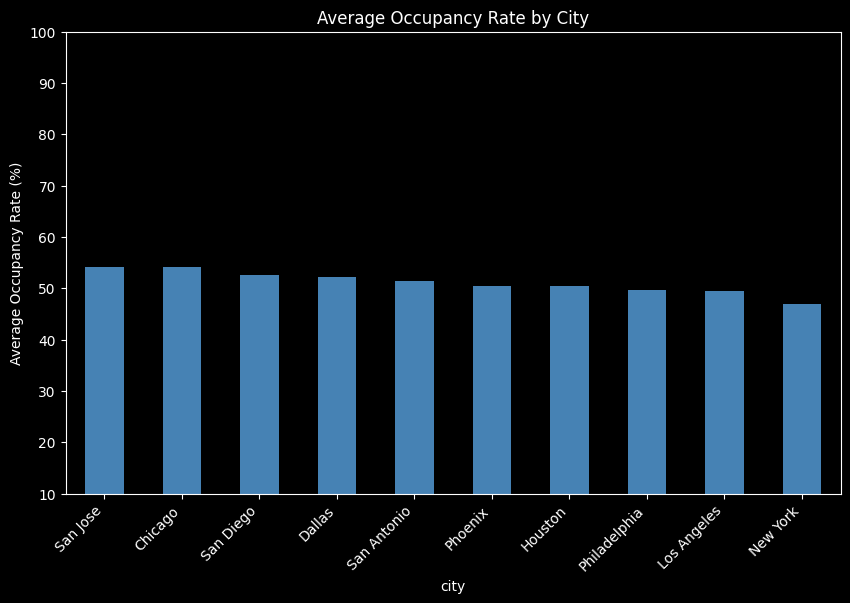

In [14]:
city_occ = df.groupby('city')['occupancy_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
city_occ.plot(kind='bar', color='steelblue')
plt.ylim(10, 100)  # y-axis from 10% to 100%
plt.ylabel('Average Occupancy Rate (%)')
plt.title('Average Occupancy Rate by City')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
# Group by city and calculate average occupancy
city_avg_occ = df.groupby('city')['occupancy_rate'].mean()

# Sort descending to find the highest
city_avg_occ_sorted = city_avg_occ.sort_values(ascending=False)

# Display the top city
top_city = city_avg_occ_sorted.head(1)
print("City with highest average occupancy:")
print(top_city)


City with highest average occupancy:
city
San Jose    54.277778
Name: occupancy_rate, dtype: float64


In [16]:
# Group by state and calculate average occupancy
state_avg_occ = df.groupby('state')['occupancy_rate'].mean()

# Sort descending to find the highest
state_avg_occ_sorted = state_avg_occ.sort_values(ascending=False)

# Display the top state
top_state = state_avg_occ_sorted.head(1)
print("State with highest average occupancy:")
print(top_state)


State with highest average occupancy:
state
IL    54.22
Name: occupancy_rate, dtype: float64


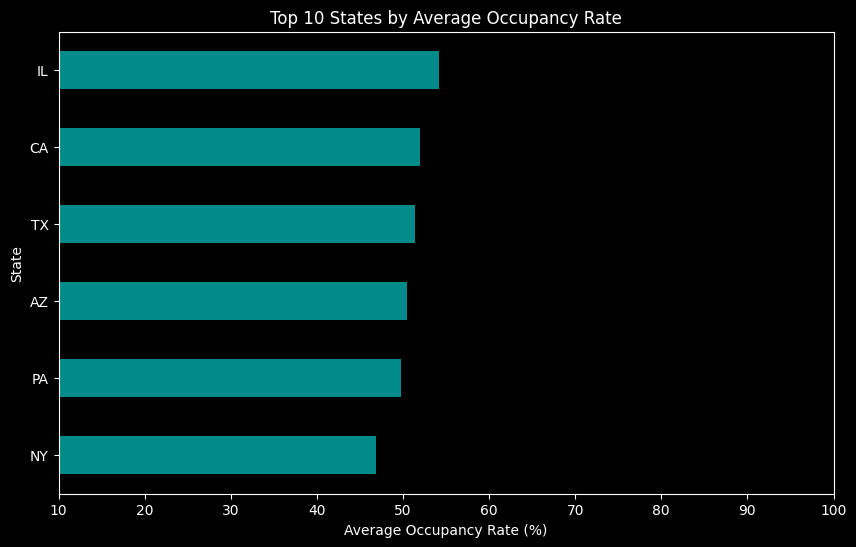

In [17]:
import matplotlib.pyplot as plt

# Compute average occupancy per state
state_avg_occ = df.groupby('state')['occupancy_rate'].mean()

# Sort descending
state_avg_occ_sorted = state_avg_occ.sort_values(ascending=False)

# Optional: pick top 10 states for clarity
top_states = state_avg_occ_sorted.head(10)

# Horizontal bar chart
plt.figure(figsize=(10,6))
top_states.plot(kind='barh', color='darkcyan')
plt.xlabel('Average Occupancy Rate (%)')
plt.ylabel('State')
plt.title('Top 10 States by Average Occupancy Rate')
plt.xlim(10, 100)  # keep y-axis percentage range clear
plt.gca().invert_yaxis()  # highest on top
plt.show()


In [18]:
max_occ_shelter = df.loc[df['occupancy_rate'].idxmax()]
print("Shelter with highest occupancy rate:")
print(max_occ_shelter)

Shelter with highest occupancy rate:
id                                   23
date                         2024-06-08
shelter_name                   HomeSafe
city                           San Jose
state                                CA
total_capacity                      271
occupied_beds                       271
available_beds                        0
occupancy_rate                    100.0
average_age                          30
male_percentage                      44
female_percentage                    56
season                           Autumn
notes                Recently renovated
Name: 22, dtype: object


In [25]:
# Compute average occupancy per season
season_avg_occ = df.groupby('season')['occupancy_rate'].mean().sort_values(ascending=False)

print("Average occupancy rate by season:")
print(season_avg_occ)

# Top season
top_season = season_avg_occ.head(1)
print("\nSeason with highest average occupancy rate:")
print(top_season)


Average occupancy rate by season:
season
Winter    53.631452
Autumn    51.254365
Summer    50.591393
Spring    49.428516
Name: occupancy_rate, dtype: float64

Season with highest average occupancy rate:
season
Winter    53.631452
Name: occupancy_rate, dtype: float64


/var/folders/1_/2f9jkk717ng8xg3wy4_0q0dh0000gn/T/ipykernel_29595/2928008241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='occupancy_rate', data=df, palette='Set2')


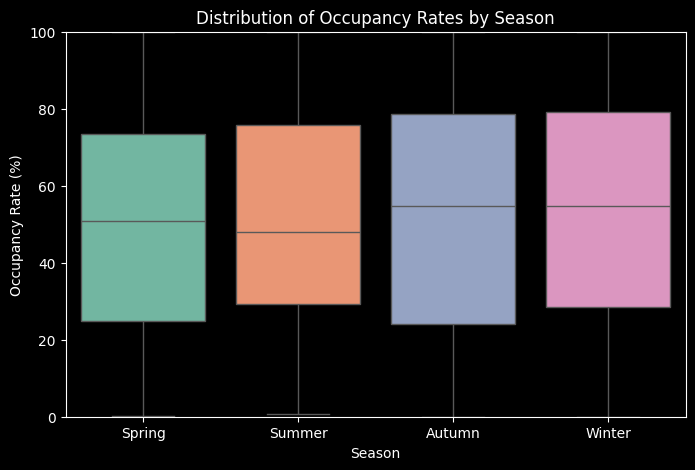

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='occupancy_rate', data=df, palette='Set2')

plt.ylabel('Occupancy Rate (%)')
plt.xlabel('Season')
plt.title('Distribution of Occupancy Rates by Season')
plt.ylim(0, 100)  # keep percentage range consistent
plt.show()
